In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data = pd.get_dummies(data,drop_first = True)
data.head()
data = data.astype(int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

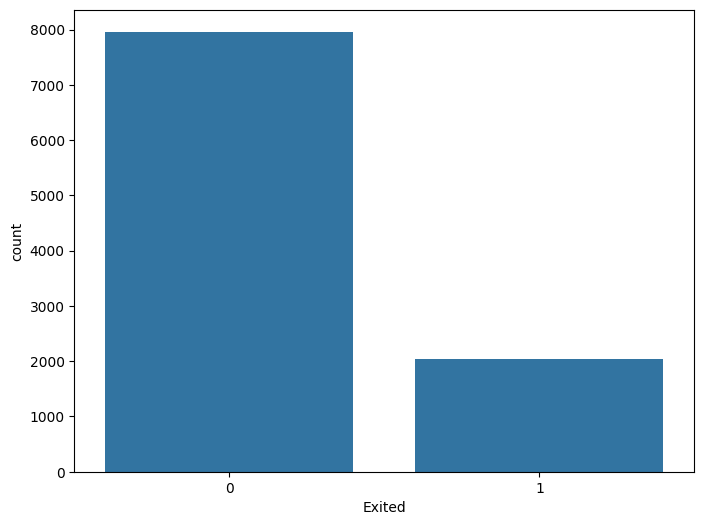

In [ ]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = data)

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]])

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.809


In [ ]:
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
svm.fit(X_train_scaled, y_train_classified)

SVC()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.865


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.868


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.796


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.84


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.867


In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.809
1,svm,0.865
2,KNN,0.868
3,dt,0.796
4,rf,0.840
5,GBC,0.867


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3989,3990,15714256,Gerasimov,666,France,Male,30,7,109805.30,1,0,1,163625.56,0
8194,8195,15620746,Lorenzo,632,France,Male,42,4,126115.60,1,1,0,100998.50,0
3631,3632,15794841,Kung,739,Spain,Male,19,5,89750.21,1,1,0,193008.52,0
2241,2242,15633112,Madukaego,681,Germany,Male,42,3,118199.97,2,1,0,9452.88,1
2539,2540,15569571,Davydova,584,Germany,Female,46,6,87361.02,2,1,0,120376.87,1


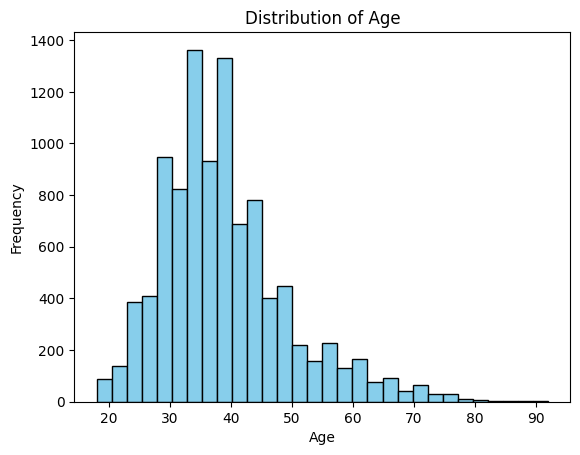

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Age' is one of its columns
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


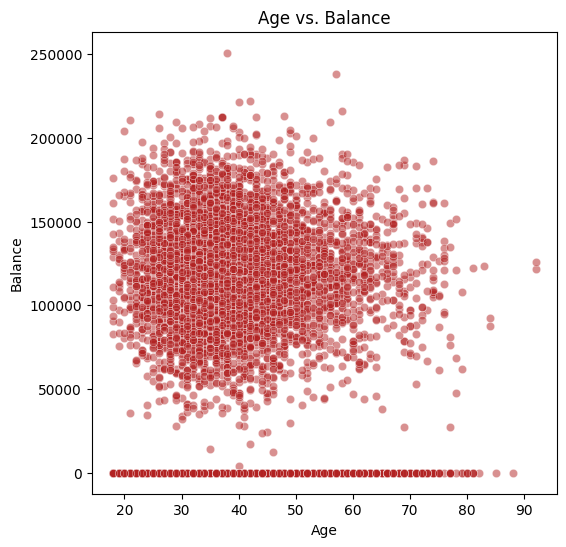

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Age', y='Balance', alpha=0.5, color='Firebrick')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance')
plt.show()

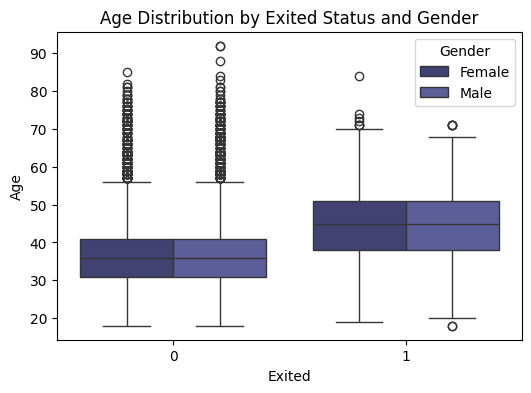

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Age', hue='Gender', data=df, palette='tab20b')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Age Distribution by Exited Status and Gender')
plt.show()

In [ ]:
pairplot = sns.pairplot(df, hue='Exited', palette='inferno', plot_kws={'alpha':0.5})
plt.title('Pairplot with Exited Status')
plt.show()

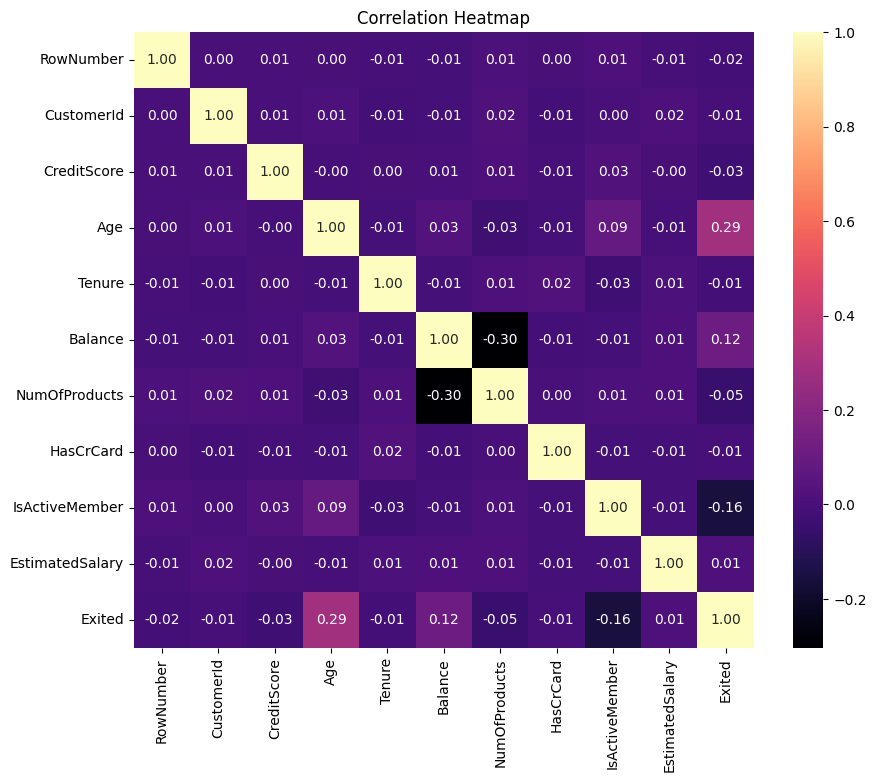

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df = pd.get_dummies(df,drop_first = True)
df = df.astype(int)
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
x_tr = sc.fit_transform(X_train)
x_ts = sc.transform(X_test)
val = 0.5
y_tr = [1 if value > val else 0 for value in y_train]

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_tr,y_tr)

LogisticRegression()

In [ ]:
lr_accuracy = lr_model.score(x_tr, y_tr)
lr_y_pred = lr_model.predict(X_test)

In [ ]:
print("Logistic Regression Model")
print(f"Accuracy: {lr_accuracy:.2%}")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Model
Accuracy: 81.14%
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.51      0.50      0.17      2000
weighted avg       0.71      0.20      0.07      2000



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_tr, y_tr)

RandomForestClassifier()

In [ ]:
rf_accuracy= rf_model.score(x_tr, y_tr)
rf_y_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forest Classifier Model")
print(f"Accuracy: {rf_accuracy:.2%}")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Model
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       0.74      0.47      0.58      1607
           1       0.12      0.31      0.18       393

    accuracy                           0.44      2000
   macro avg       0.43      0.39      0.38      2000
weighted avg       0.62      0.44      0.50      2000



In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_tr, y_tr)
gbc_accuracy = gbc_model.score(x_tr, y_tr)
gbc_y_pred = gbc_model.predict(X_test)
print("Gradient Boosting Classifier Model")
print(f"Accuracy: {gbc_accuracy:.2%}")
print(classification_report(y_test, gbc_y_pred))

Gradient Boosting Classifier Model
Accuracy: 87.29%
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1607
           1       0.17      0.09      0.12       393

    accuracy                           0.74      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.68      0.74      0.70      2000



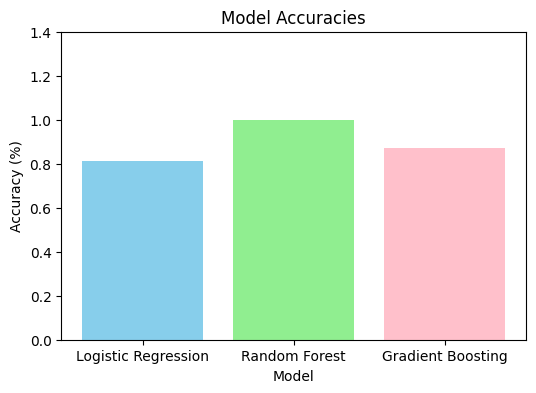

In [ ]:
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [lr_accuracy, rf_accuracy, gbc_accuracy]
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['skyblue','lightgreen','pink'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0,1.4)
plt.show()

In [ ]:
def predict_churn(input_data):
    input_features = sc.transform(input_data)
    churn_prediction = lr_model.predict(input_features)
    return churn_prediction

In [ ]:
def predict_churn_from_input():
    credit_score = int(input("Enter the customer's credit score: "))
    geography = input("Enter the customer's geography (France, Germany, Spain): ")
    gender = input("Enter the customer's gender (Male, Female): ")
    age = int(input("Enter the customer's age: "))
    tenure = int(input("Enter the customer's tenure (in years): "))
    balance = float(input("Enter the customer's account balance: "))
    num_of_products = int(input("Enter the number of bank products used by the customer: "))
    has_cr_card = int(input("Does the customer have a credit card? (Enter 1 for yes, 0 for no): "))
    is_active_member = int(input("Is the customer an active member? (Enter 1 for yes, 0 for no): "))
    estimated_salary = float(input("Enter the customer's estimated salary: "))

    input_data = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })

    input_data = pd.get_dummies(input_data, columns=['Geography', 'Gender'])
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    input_features = sc.transform(input_data)

    churn_prediction = predict_churn(input_features)
    churn_prediction_human_readable = np.where(churn_prediction == 1, 'Churn', 'No Churn')

    print(f"The predicted churn status for the customer is: {churn_prediction_human_readable[0]}")

In [ ]:
predict_churn_from_input()

Enter the customer's credit score: 5
Enter the customer's geography (France, Germany, Spain): France
Enter the customer's gender (Male, Female): Male
Enter the customer's age: 35
Enter the customer's tenure (in years): 10
Enter the customer's account balance: 5000
Enter the number of bank products used by the customer: 5
Does the customer have a credit card? (Enter 1 for yes, 0 for no): 1
Is the customer an active member? (Enter 1 for yes, 0 for no): 1
Enter the customer's estimated salary: 50000
The predicted churn status for the customer is: No Churn
